# Partitioning Method
## KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

  

* The centroids are chosen in such a way that it minimizes within cluster sum of squares.

* The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean  of the samples in the cluster. $\mu$

<img src="https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png" width="300px">

##### KMeans Algorithm
1. Initialize k centroids.
2. Select at random K points, the centroids(not necessary from the dataset)
3. Assign each data to the nearest centroid, this step will create clusters.
4. Compute and place the new centroid of each cluster.  
5. Reassign each data point to the new closest centroid. If any new reassignment, Repeat steps 4 otherwise go to Finish  

Animated Implementation of the Algorithm - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

### Random Initialization Trap
Depending on initialisation of Centroid we get different clusters for the same data  
Solution -> K-Means++

<img src="Image/kmeans1.png" width="300" />
<font size=1><center>Case 1</font>
    
<img src="Image/kmeans2.png" width="300" />
<font size=1><center>Case 2</font>


## Choosing the Right Number of Clusters
- WCSS -> Within Cluster Sum of Squares  
- Elbow Method to find the optimal number of clusters  
<img src="Image/elbow.jpg" width="300" />

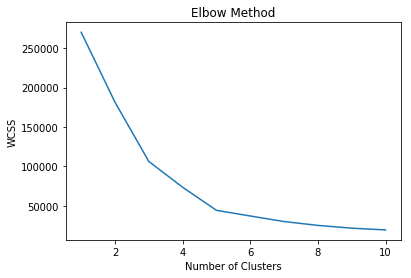

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Data/Unsupervised/Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

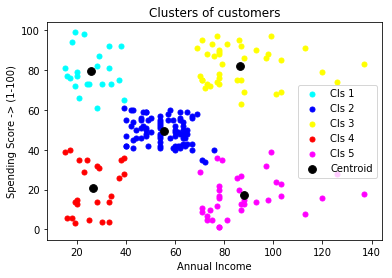

In [3]:
# Fitting K-Means to the dataset
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(X)

# Visualising the clusters
size = 25
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = size, c = 'cyan', label = 'Cls 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = size, c = 'blue', label = 'Cls 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = size, c = 'yellow', label = 'Cls 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = size, c = 'red', label = 'Cls 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = size, c = 'magenta', label = 'Cls 5')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score -> (1-100)')
plt.legend()
plt.show()

In [4]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(X)

In [5]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

# Difference Between fit and fit_predict method
* fit : Creates an affinity matrix for X using the selected affinity, then applies clustering to this affinity matrix
* fit_predict : Performs clustering on X and returns cluster labels

Note: fit_predict is equivalent to getting the labels_ attribute from the object after fit

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Data/Unsupervised/Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
k_means.fit(X)
print(k_means.labels_)

k_means_1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
print(k_means_1.fit_predict(X))

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]
[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Measuring Performance of Clusters

* silhoutte_score
* calinski_harabaz_score


## silhoutte_score

* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.


In [13]:
from sklearn.metrics import silhouette_score

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (i, silhouette_score(X,labels))

2 0.2968969162503008
3 0.46761358158775435
4 0.4931963109249047
5 0.553931997444648
6 0.53976103063432
7 0.5314247434775297
8 0.45732611752686836
9 0.4553729779390266
10 0.44973539403790147


## calinski_harabaz_score
* The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [17]:
from sklearn.metrics import calinski_harabasz_score

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (i, calinski_harabasz_score(X,labels))

2 96.25619260242958
3 151.5570090006799
4 174.0644335433684
5 247.35899338037282
6 242.29567848269156
7 254.6990131602406
8 268.6382937788907
9 271.55855058789604
10 260.21051597750545
11 263.3694322261491
12 274.63027931386483
13 279.20082460649155
14 269.77731802817084
15 285.6552409968533
16 287.3853382632505
17 282.77226080808555
18 293.1301552479272
19 303.38538133683005
